# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

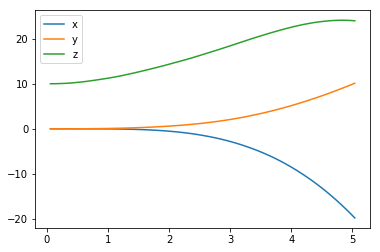

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

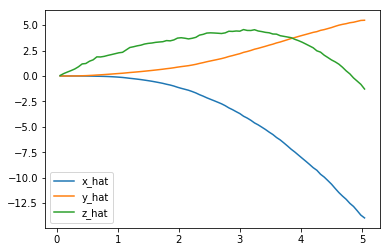

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

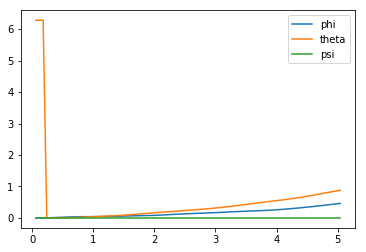

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

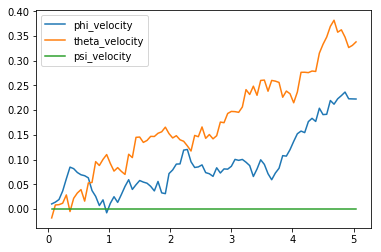

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

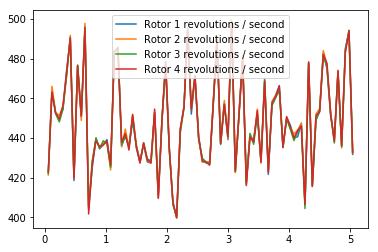

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-19.80178211  10.11385925  23.99239494   0.46082455   0.8770905    0.        ]
[-13.95111064   5.48018334  -1.27934489]
[ 0.22249549  0.33815791  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -0.150 (best =  -0.059), noise_scale = 3.2555

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [10]:
## TODO: Train your agent here.
import sys
from agents.ddpg import DDPG

from task2 import Task

num_episodes = 1000
#runtime = 10.     
target_pos = np.array([0., 0., 10.])
init_pose = np.array([0., 0., 1., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])
task = Task(target_pos=target_pos, init_pose=init_pose, init_velocities=init_velocities, init_angle_velocities=init_angle_velocities)
agent = DDPG(task)

best_reward = -np.inf
best_episode_reward = -np.inf
labels2 = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
all_results = []
labels = ['episode','episode_reward', 'average_step_reward']
results = {x : [] for x in labels}
for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() 
    episode_reward = 0
    steps = 0
    results2 = {x : [] for x in labels2}
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        steps += 1
        state = next_state
        episode_reward += reward
        if reward > best_reward:
            #print(reward)
            best_reward = reward
            
        to_write2 = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels2)):
            results2[labels2[ii]].append(to_write2[ii])
#         if (i_episode%1==0):
#             print("\rEpisode = {:4d} Reward = {:4f} Best Reward = {:4f} Best Step Reward = {:4f} steps = {} z-vel = {}".format(i_episode, episode_reward, best_episode_reward, best_reward, steps, task.sim.v[2]), end="") 
        if done:
            #print(state)
            all_results.append(results2)
            if episode_reward > best_episode_reward:
                best_episode_reward = episode_reward
            to_write = [i_episode] + [episode_reward] + [episode_reward/steps]
            for ii in range(len(labels)):
                results[labels[ii]].append(to_write[ii])
            
            if (i_episode%1==0):
                print("\rEpisode = {:4d} Reward = {:4f} Best Reward = {:4f} Best Step Reward = {:4f} avg_step_re = {:4f} steps = {}".format(i_episode, episode_reward, best_episode_reward, best_reward, episode_reward/steps, steps))
            break
    sys.stdout.flush()

Using TensorFlow backend.


SAFSFAS
9.0
Episode =    1 Reward = 9.699133 Best Reward = 9.699133 Best Step Reward = 0.949065 avg_step_re = 0.086599 steps = 112
Episode =    2 Reward = -7.483325 Best Reward = 9.699133 Best Step Reward = 0.949066 avg_step_re = -0.202252 steps = 37
Episode =    3 Reward = -2.378769 Best Reward = 9.699133 Best Step Reward = 0.949070 avg_step_re = -0.042478 steps = 56
Episode =    4 Reward = 15.069949 Best Reward = 15.069949 Best Step Reward = 0.949077 avg_step_re = 0.295489 steps = 51
Episode =    5 Reward = -5.145109 Best Reward = 15.069949 Best Step Reward = 0.949077 avg_step_re = -0.165971 steps = 31
Episode =    6 Reward = 12.107847 Best Reward = 15.069949 Best Step Reward = 0.949077 avg_step_re = 0.208756 steps = 58
Episode =    7 Reward = 2.892497 Best Reward = 15.069949 Best Step Reward = 0.949079 avg_step_re = 0.056716 steps = 51
Episode =    8 Reward = 2.631673 Best Reward = 15.069949 Best Step Reward = 0.949079 avg_step_re = 0.046170 steps = 57
Episode =    9 Reward = 1.6724

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

In [11]:
## TODO: Plot the rewards.
print(np.mean(results["episode_reward"][-10:]))
print(np.mean(results["episode_reward"][-50:]))
print(np.mean(results["episode_reward"][-100:-50]))
print(np.mean(results["episode_reward"][-200:-150]))
print(np.mean(results["episode_reward"][-250:-200]))
print(np.mean(results["episode_reward"][-350:-300]))
print(np.mean(results["episode_reward"][-450:-400]))
print(np.mean(results["episode_reward"][-550:-500]))
print(np.mean(results["episode_reward"][350:400]))
print(np.mean(results["episode_reward"][150:200]))
print(np.mean(results["episode_reward"][50:100]))
print(np.mean(results["episode_reward"][:50]))
print(np.mean(results["episode_reward"][:10]))


1.22382211883
4.80508828971
-5.21114173281
-9.30477267055
-0.741339842488
-0.870595427269
-4.52405370449
-1.18794049972
-42.0343953061
-7.82619039665
-9.06552810719
-6.41563550171
2.8269026008


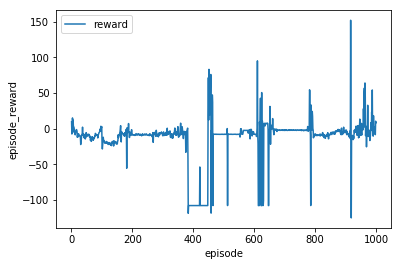

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['episode'], results['episode_reward'], label='reward')
plt.xlabel('episode')
plt.ylabel('episode_reward')
plt.legend()

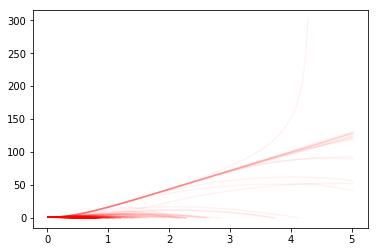

In [19]:
%matplotlib inline

# Plot the quadcopter height
for r in all_results[-500:]: plt.plot(r['time'], r['z'], 'r-', alpha=0.05) 
plt.legend()
_ = plt.ylim()

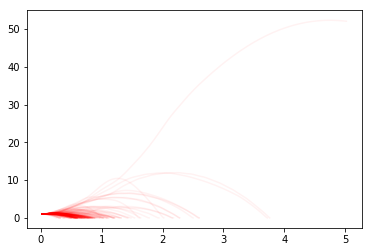

In [20]:
for r in all_results[-200:]: plt.plot(r['time'], r['z'], 'r-', alpha=0.05) 
plt.legend()
_ = plt.ylim()

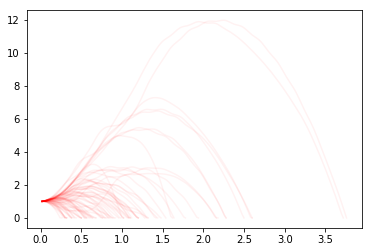

In [22]:
for r in all_results[-75:]: plt.plot(r['time'], r['z'], 'r-', alpha=0.05) 
plt.legend()
_ = plt.ylim()

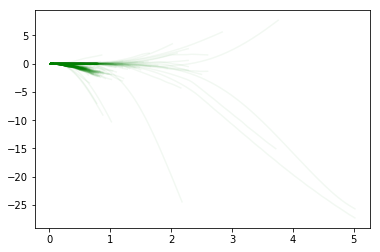

In [14]:
%matplotlib inline

# Plot the quadcopter height
for r in all_results[-300:]: plt.plot(r['time'], r['x'], 'g-', alpha=0.05) 
plt.legend()
_ = plt.ylim()

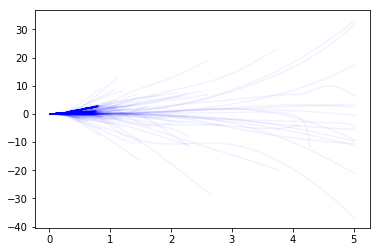

In [15]:
%matplotlib inline

# Plot the quadcopter height
for r in all_results[-500:]: plt.plot(r['time'], r['y'], 'b-', alpha=0.05) 
plt.legend()
_ = plt.ylim()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: I tried several tasks: staying on the ground, landing, take off, and hovering. Right now it is as taking off and hovering over the specified point, and this is a very complicated task to achieve in a single reward function and training. I started using the given reward function but it didnt go very well. Then I started think, how else can I improve the way the drone is moving, because it can make the distance shorter to the target in several ways, but how to ensure it is moving in the best direction. I thought the velocity should point to the target position by punishing movements that do not. Then I came up with the adea that if the drone is too close to the target, then the angle could change aggressively, so I added a normalizer when the drone stood close to it. Then I needed to punish the reward when the drone was too away, but also add a bonus when the drone was close. 

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

I used the DDPG example provided. I tried several hyperparameters but didn't really made an improvement than with the ones provided. I used the same network architecture provided. 
The actor with 32x64x32. The critic with states and actions of 32 x 64, then combined them and ended with a single output neuron. I also added batch normalization before the relu activations and l2 regularization.

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:
I think how I designed the task complexity influences on how the agent learned, but still managed to get promising and interesting results. The tasks consists on two actions the agent needs to learn: taking off and hovering near the target. 

Over the last 10 episodes the agent reached a mean reward of 1.22 and on the first 10 it reached 2.82. This may sound as if the agent did not learn correctly, but if we calculate the mean over 50 episodes at the beggining and end of training we end up with a mean of -6.41 at the beginning and 4.80 at the end. The agent started recieving many positive rewards on episodes near the end of training. I know that a the agent should stabilize after learning but the task I chose and how I designed the reward function may need a more episodes because of the complexity. The agent recieved a maximum reward of 152 and a minimum of -125 while training so the reward plot has a scale that makes it difficult to appreciate the learning curve of the agent.

I saved all the interactions the agent made during training in the al_results variable and ploted the x, y, z coordinates of each episode of training. As you can see in the z axis plot, the agent learned to move on the z coordinate very well, it learned that it had to increase on its height and you can see a strong line trend on rising up. On the last training episodes, the agent learned to decrease the rotor speed when reaching the target height, causing the agent to crash, which is very nice because now the agent needed to learn how to hover when reaching the target. On the x and y axis it also learned pretty well, it developed a trend on staying near 0 coordinates, meaning that the agent was learning efficiently. A not varying change on the coordinates during episodes means that the agent was in fact moving in an efficient way towards the target. 

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:
The hardest part of the project was probably setting a proper reward function, there are a lot of possibilities to do so, and I went through many iterations. First I tried to use the sample one, then added some tweaks to it little by little. Fisrt added pythagorean distance instead of the sum of the distances of each axis. Then added some normalization to the distance. After that I came up with the idea to penalize movements on the wrong direction so the distance gets decreased optimally. Then tried different ways, like starting from a maximum reward and penalizing it, or starting with a 0 reward and adding to it and a combination of both. I had difficulties when starting the task from the ground limit, the simmulation stopped from the first step the agent made. 
One interesting behavior in one of my tests was that the drone managed to focus power on 2 rotors instead of the 4, and the two left were used for stabilization.